In [40]:
import pandas as pd
import pickle 
import os
!pip install openpyxl


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [41]:
df = pd.read_excel('Data/Déchets-annuels-plastiques-côtes-océans-par-pays.xlsx')

df.head()

,YEAR,COUNTRY,VALUE PER TONNE
0,2010-2019,Albania,30122
1,2010-2019,Algeria,258511
2,2010-2019,Angola,53537
3,2010-2019,Antigua and Barbuda,403
4,2010-2019,Argentina,20790


In [42]:
# Nettoyage des espaces et mise en forme des noms de pays
df['COUNTRY'] = df['COUNTRY'].str.strip().str.title()

# Mets aussi ta liste de pays au même format
pays_mediterranee = [
    "France", "Espagne", "Italie", "Grèce", "Turquie", "Maroc", "Algérie", "Tunisie",
    "Libye", "Égypte", "Israël", "Liban", "Syrie", "Chypre", "Malte", "Monaco", "Slovénie", "Croatie", "Monténégro", "Albanie", "Bosnie-Herzégovine"
]

# Filtrer le DataFrame pour ces pays
df_med = df[df['COUNTRY'].isin(pays_mediterranee)]

print(df_med['COUNTRY'].unique())  # Vérifie les pays retenus

# Top 10 des pays méditerranéens par rejets cumulés sur toutes les années
top10 = (
    df_med.groupby('COUNTRY')['VALUE PER TONNE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10)

['France']
COUNTRY
France    1669
Name: VALUE PER TONNE, dtype: int64


In [43]:
print(sorted(df['COUNTRY'].unique()))

['Albania', 'Algeria', 'Angola', 'Antigua And Barbuda', 'Argentina', 'Ashmore & Cartier Is. (Aust.)', 'Australia', 'Azores Islands (Port.)', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bird Island', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Canary Islands (Sp.)', 'Cape Verde', 'Chagos Archipelago (Mauritius)', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', "Côte D'Ivoire", "Democratic People'S Republic Of Korea", 'Democratic Republic Of The Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China', 'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic Of)', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',

In [44]:
pays_mediterranee_en = [
    "Albania", "Algeria", "Bosnia-Herzegovina", "Croatia", "Cyprus", "Egypt", "France",
    "Greece", "Israel", "Italy", "Lebanon", "Libya", "Malta", "Monaco", "Montenegro",
    "Morocco", "Slovenia", "Spain", "Syrian Arab Republic", "Tunisia", "Turkey"
]

# Nettoyage des espaces et mise en forme des noms de pays
df['COUNTRY'] = df['COUNTRY'].str.strip().str.title()

# Attention : certains noms comme "Syrian Arab Republic" doivent être exactement comme dans ta liste unique
# Adapte si besoin, par exemple :
df['COUNTRY'] = df['COUNTRY'].replace({
    "Bosnia And Herzegovina": "Bosnia-Herzegovina",
    "Syria": "Syrian Arab Republic"
})

# Filtrer le DataFrame pour ces pays
df_med = df[df['COUNTRY'].isin(pays_mediterranee_en)]

print(df_med['COUNTRY'].unique())  # Vérifie les pays retenus

# Top 10 des pays méditerranéens par rejets cumulés sur toutes les années
top10 = (
    df_med.groupby('COUNTRY')['VALUE PER TONNE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10)

['Albania' 'Algeria' 'Croatia' 'Cyprus' 'France' 'Greece' 'Israel' 'Italy'
 'Lebanon' 'Libya' 'Malta' 'Montenegro' 'Morocco' 'Spain'
 'Syrian Arab Republic' 'Tunisia' 'Turkey' 'Egypt']
COUNTRY
Turkey     519066
Egypt      259857
Algeria    258511
Tunisia    132766
Libya      101786
Morocco     93076
Greece      35777
Albania     30122
Lebanon     27562
Italy        9450
Name: VALUE PER TONNE, dtype: int64


In [45]:
df.shape,df.shape[0]

((149, 3), 149)

In [46]:
print(df.columns)

Index(['YEAR', 'COUNTRY', 'VALUE PER TONNE'], dtype='object')


In [47]:
df.info()
print("---------ppppppppppppppppppppppppppp---------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   YEAR             149 non-null    object
 1   COUNTRY          149 non-null    object
 2   VALUE PER TONNE  149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB
---------ppppppppppppppppppppppppppp---------


,VALUE PER TONNE
count,1.490000e+02
mean,1.128643e+05
std,3.817329e+05
min,3.000000e+01
25%,1.229000e+03
50%,9.450000e+03
75%,4.400600e+04
max,3.185508e+06


In [48]:
print(df.isnull().sum())

YEAR               0
COUNTRY            0
VALUE PER TONNE    0
dtype: int64


In [49]:
print(df.head())

        YEAR              COUNTRY  VALUE PER TONNE
0  2010-2019              Albania            30122
1  2010-2019              Algeria           258511
2  2010-2019               Angola            53537
3  2010-2019  Antigua And Barbuda              403
4  2010-2019            Argentina            20790


In [50]:
pip install folium


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
print(df.columns)

Index(['YEAR', 'COUNTRY', 'VALUE PER TONNE'], dtype='object')


In [61]:
import matplotlib.pyplot as plt

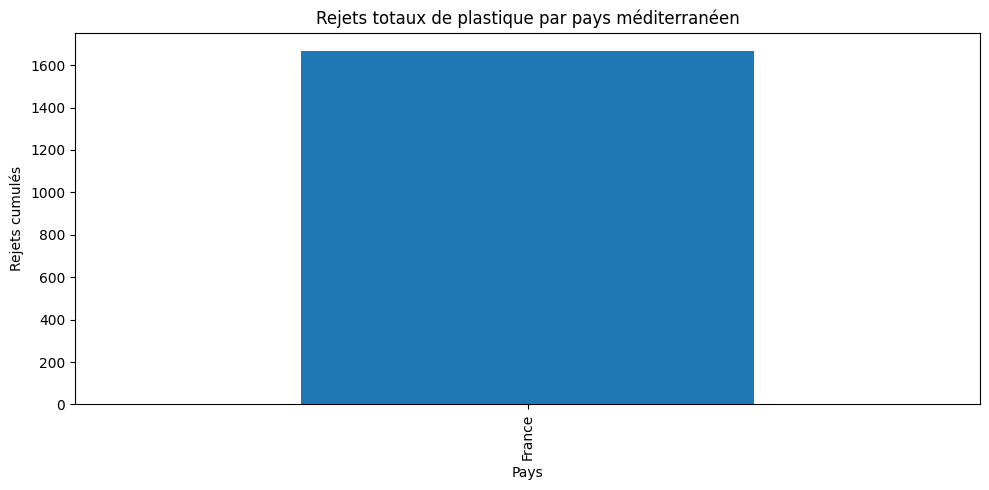

In [62]:
grouped.plot(kind='bar', figsize=(10,5))
plt.title("Rejets totaux de plastique par pays méditerranéen")
plt.ylabel("Rejets cumulés")
plt.xlabel("Pays")
plt.tight_layout()
plt.show()

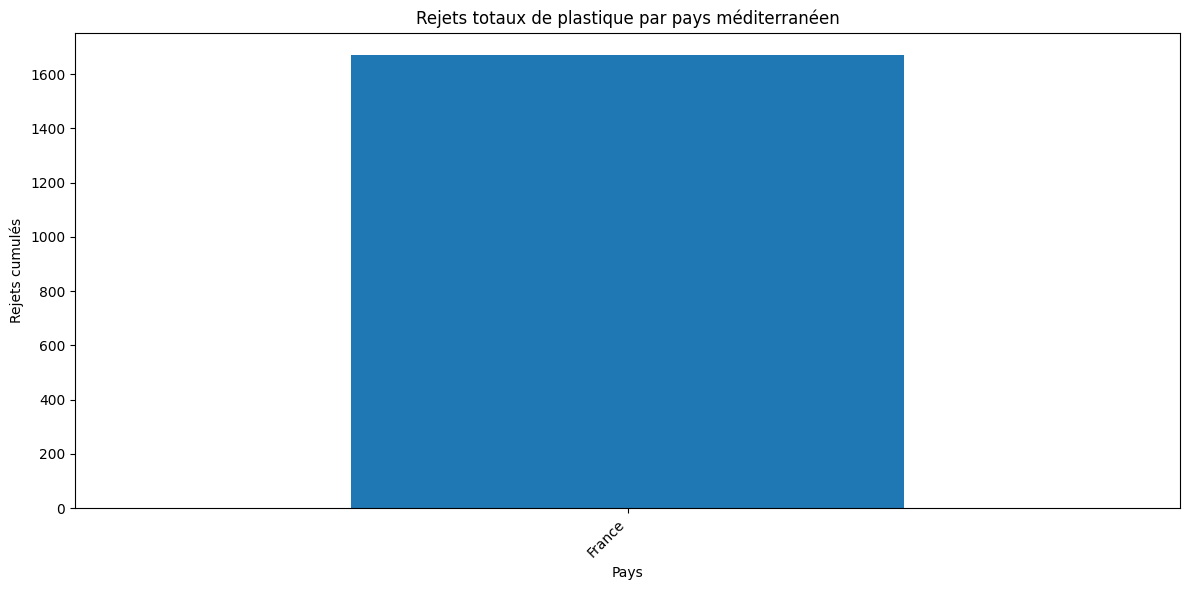

In [56]:
import matplotlib.pyplot as plt

# Couleurs personnalisées pour chaque pays (optionnel)
couleurs = plt.cm.tab20.colors  # 20 couleurs différentes

grouped.plot(
    kind='bar',
    figsize=(12,6),
    color=[couleurs[i % len(couleurs)] for i in range(len(grouped))]
)
plt.title("Rejets totaux de plastique par pays méditerranéen")
plt.ylabel("Rejets cumulés")
plt.xlabel("Pays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

REGION
Europe de l'Ouest    1669
Name: VALUE PER TONNE, dtype: int64


/tmp/ipykernel_1182665/1774088071.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med['REGION'] = df_med['COUNTRY'].map(pays_region)


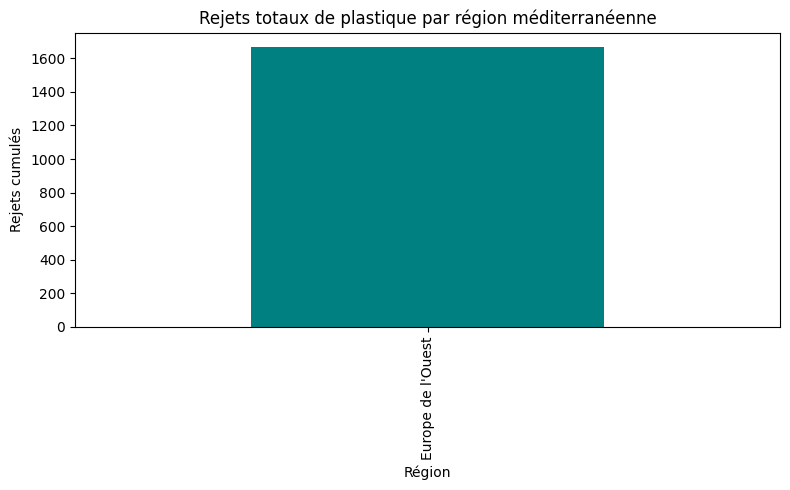

In [57]:
import matplotlib.pyplot as plt

# Dictionnaire de correspondance pays -> région
pays_region = {
    "France": "Europe de l'Ouest",
    "Espagne": "Europe de l'Ouest",
    "Italie": "Europe de l'Ouest",
    "Grèce": "Europe du Sud-Est",
    "Slovénie": "Europe du Sud-Est",
    "Croatie": "Europe du Sud-Est",
    "Monténégro": "Europe du Sud-Est",
    "Albanie": "Europe du Sud-Est",
    "Bosnie-Herzégovine": "Europe du Sud-Est",
    "Malte": "Europe du Sud-Est",
    "Monaco": "Europe de l'Ouest",
    "Chypre": "Moyen-Orient",
    "Turquie": "Moyen-Orient",
    "Israël": "Moyen-Orient",
    "Liban": "Moyen-Orient",
    "Syrie": "Moyen-Orient",
    "Égypte": "Afrique du Nord",
    "Libye": "Afrique du Nord",
    "Tunisie": "Afrique du Nord",
    "Algérie": "Afrique du Nord",
    "Maroc": "Afrique du Nord"
}

# Ajout d'une colonne région
df_med['REGION'] = df_med['COUNTRY'].map(pays_region)

# Groupby par région
grouped_region = df_med.groupby('REGION')['VALUE PER TONNE'].sum().sort_values(ascending=False)
print(grouped_region)

# Affichage graphique
grouped_region.plot(kind='bar', color='teal', figsize=(8,5))
plt.title("Rejets totaux de plastique par région méditerranéenne")
plt.ylabel("Rejets cumulés")
plt.xlabel("Région")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1182665/264526174.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med['REGION_CUSTOM'] = df_med['COUNTRY'].map(pays_region_custom)


REGION_CUSTOM
France    1669
Name: VALUE PER TONNE, dtype: int64


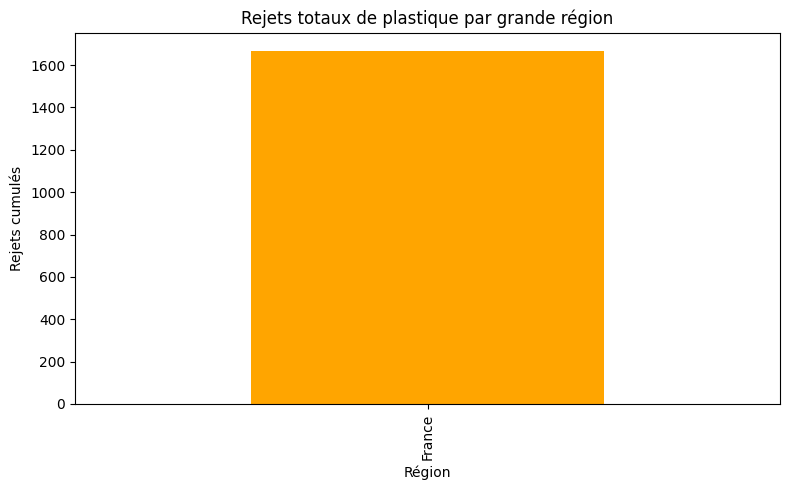

In [58]:
import matplotlib.pyplot as plt

# Nouveau mapping pour répondre à ta demande
pays_region_custom = {
    "France": "France",
    "Espagne": "Union Européenne",
    "Italie": "Union Européenne",
    "Grèce": "Union Européenne",
    "Slovénie": "Union Européenne",
    "Croatie": "Union Européenne",
    "Monténégro": "Union Européenne",
    "Albanie": "Union Européenne",
    "Bosnie-Herzégovine": "Union Européenne",
    "Malte": "Union Européenne",
    "Monaco": "Union Européenne",
    "Chypre": "Moyen-Orient",
    "Turquie": "Moyen-Orient",
    "Israël": "Moyen-Orient",
    "Liban": "Moyen-Orient",
    "Syrie": "Moyen-Orient",
    "Égypte": "Afrique du Nord",
    "Libye": "Afrique du Nord",
    "Tunisie": "Afrique du Nord",
    "Algérie": "Afrique du Nord",
    "Maroc": "Afrique du Nord"
}

# Ajout d'une colonne région personnalisée
df_med['REGION_CUSTOM'] = df_med['COUNTRY'].map(pays_region_custom)

# Groupby par région personnalisée
grouped_region_custom = df_med.groupby('REGION_CUSTOM')['VALUE PER TONNE'].sum().sort_values(ascending=False)
print(grouped_region_custom)

# Affichage graphique
grouped_region_custom.plot(kind='bar', color='orange', figsize=(8,5))
plt.title("Rejets totaux de plastique par grande région")
plt.ylabel("Rejets cumulés")
plt.xlabel("Région")
plt.tight_layout()
plt.show()

COUNTRY
France    1669
Name: VALUE PER TONNE, dtype: int64


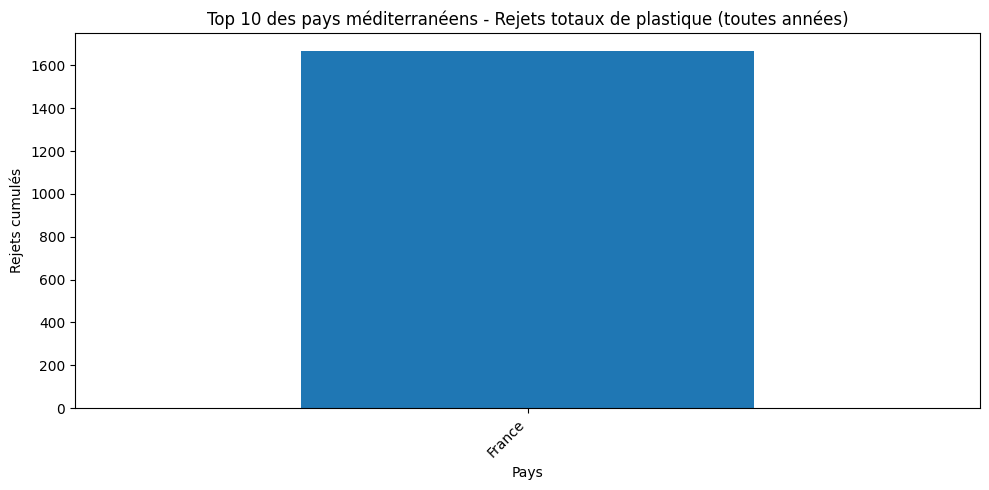

In [59]:
import matplotlib.pyplot as plt

# Nettoyage des espaces éventuels
df['COUNTRY'] = df['COUNTRY'].str.strip()

# Top 10 des pays méditerranéens par rejets cumulés sur toutes les années
top10 = (
    df_med.groupby('COUNTRY')['VALUE PER TONNE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10)

# Affichage graphique
couleurs = plt.cm.tab10.colors  # 10 couleurs différentes
top10.plot(
    kind='bar',
    figsize=(10,5),
    color=[couleurs[i % len(couleurs)] for i in range(len(top10))]
)
plt.title("Top 10 des pays méditerranéens - Rejets totaux de plastique (toutes années)")
plt.ylabel("Rejets cumulés")
plt.xlabel("Pays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
pays_mediterranee_en = [
    "Albania", "Algeria", "Bosnia-Herzegovina", "Croatia", "Cyprus", "Egypt", "France",
    "Greece", "Israel", "Italy", "Lebanon", "Libya", "Malta", "Monaco", "Montenegro",
    "Morocco", "Slovenia", "Spain", "Syrian Arab Republic", "Tunisia", "Turkey"
]

# Nettoyage des espaces et mise en forme des noms de pays
df['COUNTRY'] = df['COUNTRY'].str.strip().str.title()

# Attention : certains noms comme "Syrian Arab Republic" doivent être exactement comme dans ta liste unique
# Adapte si besoin, par exemple :
df['COUNTRY'] = df['COUNTRY'].replace({
    "Bosnia And Herzegovina": "Bosnia-Herzegovina",
    "Syria": "Syrian Arab Republic"
})

# Filtrer le DataFrame pour ces pays
df_med = df[df['COUNTRY'].isin(pays_mediterranee_en)]

print(df_med['COUNTRY'].unique())  # Vérifie les pays retenus

# Top 10 des pays méditerranéens par rejets cumulés sur toutes les années
top10 = (
    df_med.groupby('COUNTRY')['VALUE PER TONNE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10)

['Albania' 'Algeria' 'Croatia' 'Cyprus' 'France' 'Greece' 'Israel' 'Italy'
 'Lebanon' 'Libya' 'Malta' 'Montenegro' 'Morocco' 'Spain'
 'Syrian Arab Republic' 'Tunisia' 'Turkey' 'Egypt']
COUNTRY
Turkey     519066
Egypt      259857
Algeria    258511
Tunisia    132766
Libya      101786
Morocco     93076
Greece      35777
Albania     30122
Lebanon     27562
Italy        9450
Name: VALUE PER TONNE, dtype: int64


COUNTRY
China          3185508
Philippines    2642449
India          1521591
Brazil          940540
Indonesia       926209
Viet Nam        656644
Malaysia        546318
Turkey          519066
Nigeria         502546
Bangladesh      452158
Name: VALUE PER TONNE, dtype: int64


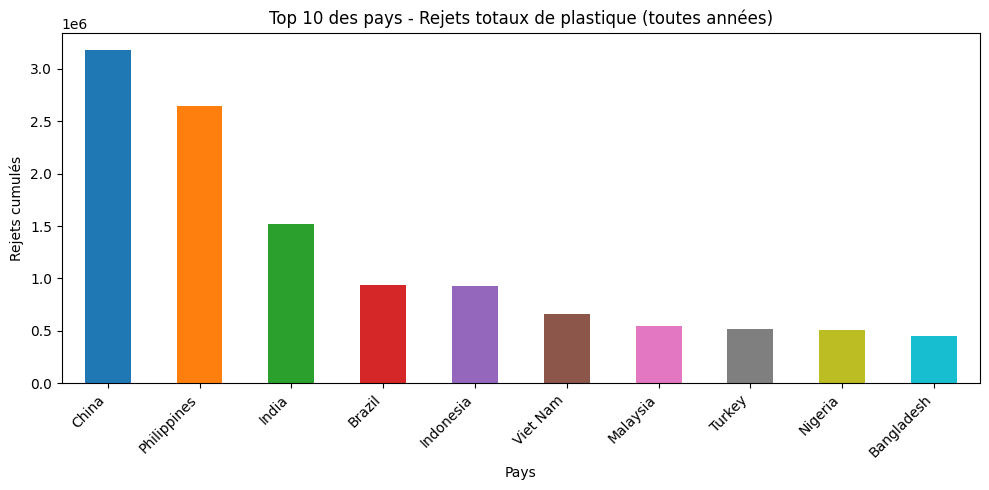

In [65]:
import matplotlib.pyplot as plt

# Top 10 des pays (tous pays confondus) ayant rejeté le plus de plastique sur toutes les années
top10_all = (
    df.groupby('COUNTRY')['VALUE PER TONNE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10_all)

# Affichage graphique
couleurs = plt.cm.tab10.colors
top10_all.plot(
    kind='bar',
    figsize=(10,5),
    color=[couleurs[i % len(couleurs)] for i in range(len(top10_all))]
)
plt.title("Top 10 des pays - Rejets totaux de plastique (toutes années)")
plt.ylabel("Rejets cumulés")
plt.xlabel("Pays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

COUNTRY
Turkey     519066
Egypt      259857
Algeria    258511
Tunisia    132766
Libya      101786
Morocco     93076
Greece      35777
Albania     30122
Lebanon     27562
Italy        9450
Name: VALUE PER TONNE, dtype: int64


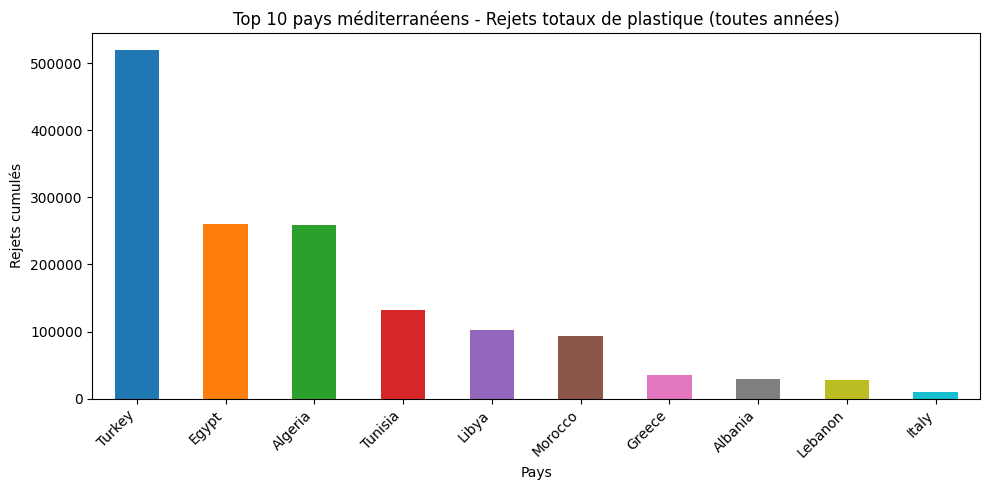

In [66]:
pays_mediterranee_en = [
    "Albania", "Algeria", "Bosnia-Herzegovina", "Croatia", "Cyprus", "Egypt", "France",
    "Greece", "Israel", "Italy", "Lebanon", "Libya", "Malta", "Monaco", "Montenegro",
    "Morocco", "Slovenia", "Spain", "Syrian Arab Republic", "Tunisia", "Turkey"
]

# Nettoyage des espaces et mise en forme des noms de pays
df['COUNTRY'] = df['COUNTRY'].str.strip()

# Harmonisation des noms si besoin
df['COUNTRY'] = df['COUNTRY'].replace({
    "Bosnia And Herzegovina": "Bosnia-Herzegovina",
    "Syria": "Syrian Arab Republic"
})

# Filtrer le DataFrame pour les pays méditerranéens
df_med = df[df['COUNTRY'].isin(pays_mediterranee_en)]

# Top 10 des pays méditerranéens par rejets cumulés sur toutes les années
top10_med = (
    df_med.groupby('COUNTRY')['VALUE PER TONNE']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top10_med)

# Affichage graphique
import matplotlib.pyplot as plt
couleurs = plt.cm.tab10.colors
top10_med.plot(
    kind='bar',
    figsize=(10,5),
    color=[couleurs[i % len(couleurs)] for i in range(len(top10_med))]
)
plt.title("Top 10 pays méditerranéens - Rejets totaux de plastique (toutes années)")
plt.ylabel("Rejets cumulés")
plt.xlabel("Pays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()